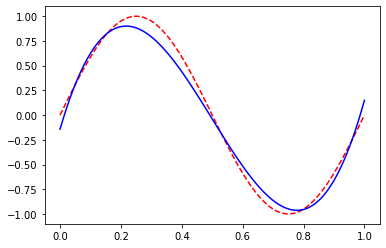

In [1]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from util.predict import PredictedDist
from util.function import createData
import numpy as np
import matplotlib.pyplot as plt

BAYES = 1 #ベイズ推定
MLE = 0   #最尤推定

class Polynomial:
    """
    本クラスは簡単な多項式を生成するクラス。
    多項式としては、1+x^1+x^2・・・x^(D-1) の多項式を提供します。（Dは設定した次元数）
    使用方法
    クラス生成時に次元数を引数に与えるだけで、関数取得時に設定した次元数の多項式を生成します。
    取得する時のメソッドはgetFunction()です。
    引数として、ベクトルもしくは、1つのパラメータを入力する必要があります。
    """
    def __init__(self, diag):
        self.diag = diag
    def getFunction(self, x):
        func = np.array([x**i for i in range(self.diag)])
        return func.T

def main():
    def func(x):
        return np.sin(2*np.pi*x)

    
    x_train, t_train = createData(func, 0 , 1, 20)

    # 5次元の多項式を使用する
    poly = Polynomial(5)
    X = poly.getFunction(x_train)

    # 訓練データを用いて、学習を行う
    model = PredictedDist(mode=BAYES)
    model.fit(X,t_train)

    x = np.linspace(0,1,100)
    mean, _= model.predict(poly.getFunction(x))
    plt.plot(x, func(x), color='red', linestyle = "dashed", label="$sin(2\pi x)$")
    plt.plot(x, mean, color='blue',label="regression") 
    plt.show() 

main()
